# Predicting *colonies* with YOLOv8

* **Important**: YOLOv8 is trained using BGR. That means that when you are predicting you should *use the same image format*!

In [1]:
from ultralytics import YOLO

model_path = '/Users/guillemcobos/Documents/GitHub/colony-counting-detection-yolov8/runs/detect/train2/weights/last.pt'
model = YOLO(model_path)

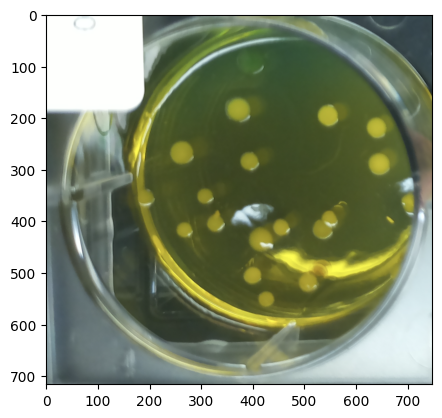

In [5]:
import matplotlib.pyplot as plt
import cv2

image_path = 'tests & old/vibrios/Vibrio1.png'
img = cv2.imread(image_path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H, W, _ = img.shape
plt.imshow(rgb)
plt.show()


0: 640x640 15 vibrios, 278.4ms
Speed: 1.8ms preprocess, 278.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


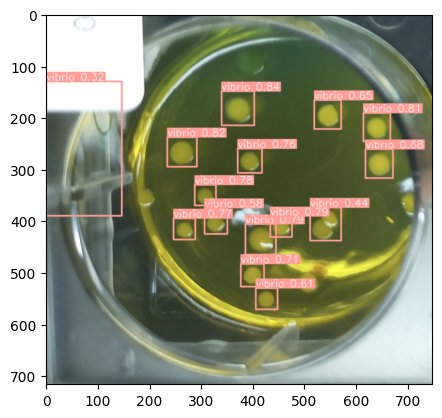

In [10]:
results = model(img, conf = 0.2, iou = 0.7, classes = [1]) # Important: classes argument is a list that limits the classes in prediction
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.show()

## Batch predictions
* Define a list with the paths to the images you want to do detection on.

In [11]:
import os
img_paths_list =[os.path.join('tests & old/vibrios', file) for file in os.listdir('tests & old/vibrios') if 'png' in file]
img_paths_list

['tests & old/vibrios/Vibrio1.png',
 'tests & old/vibrios/Vibrio3.png',
 'tests & old/vibrios/Vibrio2.png',
 'tests & old/vibrios/Vibrio6.png',
 'tests & old/vibrios/Vibrio5.png',
 'tests & old/vibrios/Vibrio4.png']

tests & old/vibrios/Vibrio1.png


0: 640x640 15 vibrios, 380.1ms
Speed: 22.6ms preprocess, 380.1ms inference, 18.1ms postprocess per image at shape (1, 3, 640, 640)


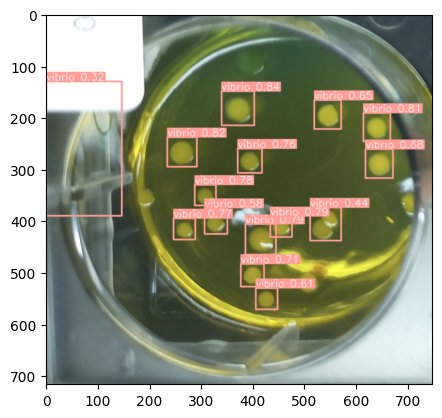

tests & old/vibrios/Vibrio2.png


0: 544x640 9 vibrios, 258.1ms
Speed: 1.5ms preprocess, 258.1ms inference, 0.5ms postprocess per image at shape (1, 3, 544, 640)


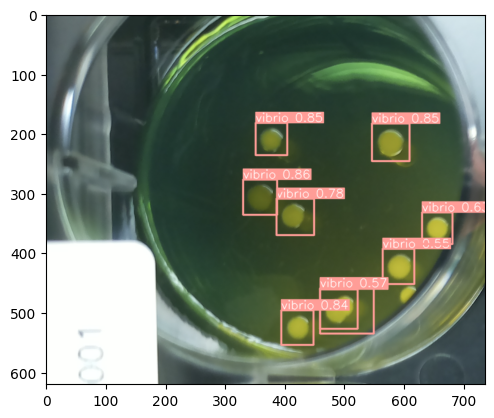

tests & old/vibrios/Vibrio3.png


0: 640x640 18 vibrios, 308.7ms
Speed: 2.2ms preprocess, 308.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


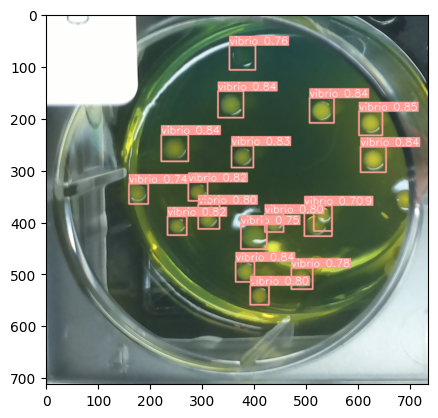

tests & old/vibrios/Vibrio4.png


0: 544x640 10 vibrios, 250.1ms
Speed: 1.4ms preprocess, 250.1ms inference, 0.4ms postprocess per image at shape (1, 3, 544, 640)


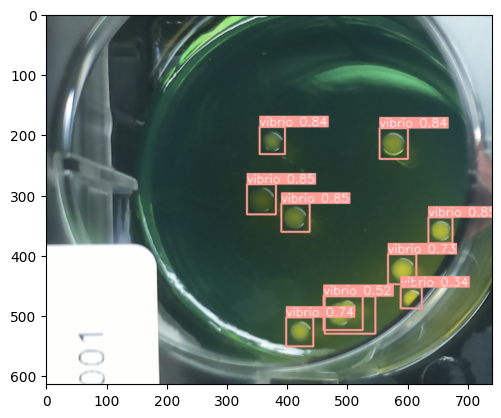

tests & old/vibrios/Vibrio5.png


0: 640x640 19 vibrios, 303.2ms
Speed: 1.8ms preprocess, 303.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


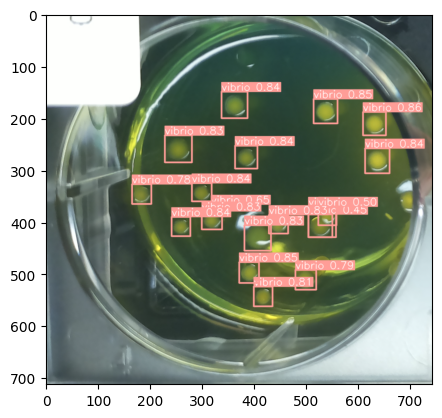

tests & old/vibrios/Vibrio6.png


0: 544x640 9 vibrios, 245.5ms
Speed: 1.7ms preprocess, 245.5ms inference, 0.5ms postprocess per image at shape (1, 3, 544, 640)


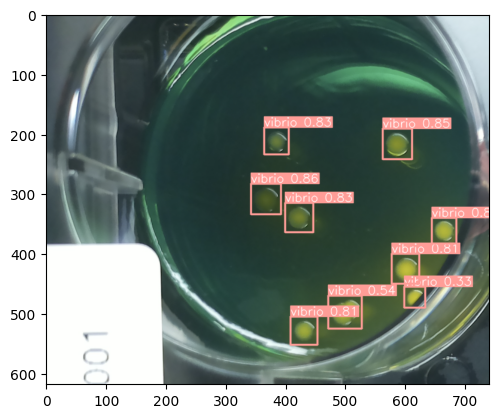

In [16]:
for img_path in sorted(img_paths_list):
    print(img_path)
    img = cv2.imread(img_path)
    results = model(img,  classes = [1])
    res_plotted = results[0].plot()
    plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
    plt.show()
    